In [46]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image
import cv2

import os 
import numpy as np
import pathlib



In [47]:
data_dir = "/kaggle/input/rice-image-dataset/Rice_Image_Dataset"
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/kaggle/input/rice-image-dataset/Rice_Image_Dataset')

In [48]:
arborio = list(data_dir.glob('Arborio/*')) [:600]
basmati = list(data_dir.glob('Basmati/*')) [:600]
ipsala = list(data_dir.glob('Ipsala/*')) [:600]
jasmine = list(data_dir.glob('Jasmine/*')) [:600]
karacadag = list(data_dir.glob('Karacadag/*')) [:600]

In [49]:
img = cv2.imread(str(arborio[0]))# Converting it into numerical arrays 
img.shape # Its currently 250 by 250 by 3

(250, 250, 3)

In [50]:
df_images = {
    'arborio': arborio,
    'basmati': basmati,
    'ipsala': ipsala,
    'jasmine': jasmine,
    'karacadag': karacadag
}
#Contains numerical labels for the categories
df_labels = {
    'arborio': 0,
    'basmati': 1,
    'ipsala': 2,
    'jasmine': 3,
    'karacadag': 4
}

In [51]:
X, y = [], [] # X = images, y = labels
for label, images in df_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224)) #
        X.append(resized_img)
        y.append(df_labels [label])

In [52]:
X= np.array(X)
X=X/255
y= np.array(y)

In [53]:
#Separating data into training, test and validation sets
X_train, X_test_val, y_train, y_test_val=train_test_split(X, y)
X_test, X_val, y_test, y_val=train_test_split(X_test_val, y_test_val)

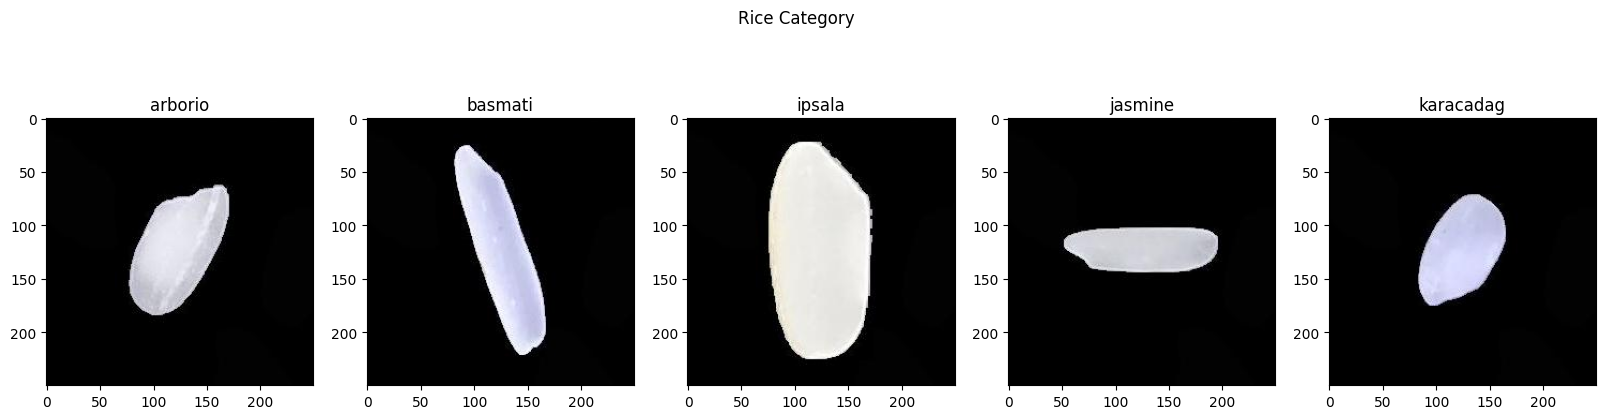

In [54]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg  # Use a distinct alias
# assume arborio, basmati, etc. are already defined
fig, ax = plt.subplots(ncols=5, figsize=(20, 5))
fig.suptitle('Rice Category')

# Use mpimg instead of img to avoid conflict
arborio_image = mpimg.imread(arborio[0])
basmati_image = mpimg.imread(basmati[0])
ipsala_image = mpimg.imread(ipsala[0])
jasmine_image = mpimg.imread(jasmine[0])
karacadag_image = mpimg.imread(karacadag[0])

# Set titles
ax[0].set_title('arborio')
ax[1].set_title('basmati')
ax[2].set_title('ipsala')
ax[3].set_title('jasmine')
ax[4].set_title('karacadag')

# Show images
ax[0].imshow(arborio_image)
ax[1].imshow(basmati_image)
ax[2].imshow(ipsala_image)
ax[3].imshow(jasmine_image)
ax[4].imshow(karacadag_image)

In [55]:
import tensorflow_hub as hub
# URL to MobileNetV2 feature vector
mobile_net_url = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

# Load the model from TF Hub
mobile_net = hub.KerasLayer(
    mobile_net_url, input_shape=(224, 224, 3), trainable=False
)

In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Lambda
import tensorflow_hub as hub

num_label = 5

mobile_net_hub_layer = hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4") 
# Replace with your actual MobileNet URL

model = Sequential([
    Lambda(lambda x: mobile_net_hub_layer(x), name='mobilenet_wrapper'), # Wrap the hub layer
    Dense(num_label)
])

model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_wrapper (Lambda)           │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']  # or 'acc', but 'accuracy' is clearer and preferred
)


In [61]:
#training the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.2105 - loss: 0.6482 - val_accuracy: 0.1702 - val_loss: 0.6987
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.2093 - loss: 0.6481 - val_accuracy: 0.1862 - val_loss: 0.7873
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.2210 - loss: 0.6475 - val_accuracy: 0.1862 - val_loss: 0.8459
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.2390 - loss: 0.6357 - val_accuracy: 0.1862 - val_loss: 0.7749
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.2059 - loss: 0.6674 - val_accuracy: 0.1862 - val_loss: 0.7627
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.2288 - loss: 0.6324 - val_accuracy: 0.1915 - val_loss: 0.8418
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.1988 - loss: 0.6714 - val_accuracy: 0.1809 - val_loss: 0.7646
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.2146 - loss: 0.6456 - val_accuracy: 0.1968 - v

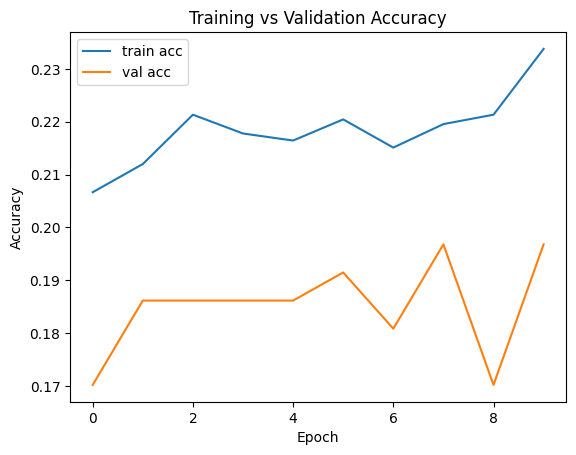

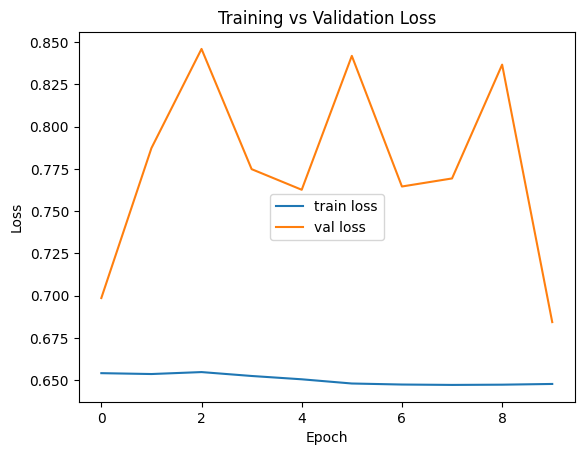

In [62]:
#visualizing the training
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


In [66]:
model.evaluate(X_test,y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - accuracy: 0.2340 - loss: 0.6612


[0.6822853088378906, 0.21886120736598969]

In [69]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_bool))


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step
              precision    recall  f1-score   support

           0       0.21      1.00      0.34       112
           1       1.00      0.04      0.07       110
           2       0.00      0.00      0.00       118
           3       0.00      0.00      0.00       111
           4       1.00      0.06      0.12       111

    accuracy                           0.22       562
   macro avg       0.44      0.22      0.11       562
weighted avg       0.43      0.22      0.11       562



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)


In [73]:
print(np.unique(y_train), np.unique(y_test))  # Should be [0 1 2 3 4] for 5 classes
print(y_pred_bool[:10])  # Should show a variety of predictions


[0 1 2 3 4] [0 1 2 3 4]
[0 0 0 0 0 0 0 0 0 0]


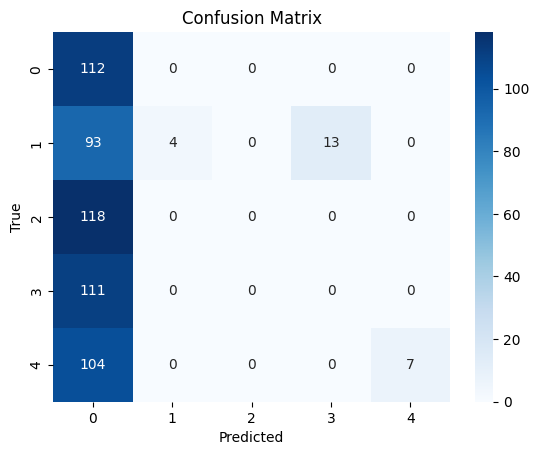

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_bool)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [75]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# Then pass it to model.fit
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), class_weight=class_weights)


Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.2274 - loss: 0.6368 - val_accuracy: 0.2181 - val_loss: 0.7598
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.2209 - loss: 0.6666 - val_accuracy: 0.2074 - val_loss: 0.7628
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.2258 - loss: 0.6422 - val_accuracy: 0.1968 - val_loss: 0.7623
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.2158 - loss: 0.6445 - val_accuracy: 0.1915 - val_loss: 0.6978
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.2176 - loss: 0.6425 - val_accuracy: 0.1968 - val_loss: 0.8458
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.2204 - loss: 0.6514 - val_accuracy: 0.1968 - val_loss: 0.7573
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.2348 - loss: 0.6375 - val_accuracy: 0.2234 - val_loss: 0.7650
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.2307 - loss: 0.6627 - val_accuracy: 0.1968 - v

In [76]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_bool))


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step
              precision    recall  f1-score   support

           0       0.21      1.00      0.35       112
           1       1.00      0.09      0.17       110
           2       0.00      0.00      0.00       118
           3       0.00      0.00      0.00       111
           4       1.00      0.07      0.13       111

    accuracy                           0.23       562
   macro avg       0.44      0.23      0.13       562
weighted avg       0.43      0.23      0.13       562



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
print(np.unique(y_train))
print(np.unique(y_test))


[0 1 2 3 4]
[0 1 2 3 4]


In [78]:
y_pred = model.predict(X_test)
y_pred_bool = np.argmax(y_pred, axis=1)
print(np.unique(y_pred_bool))


18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step
[0 1 3 4]


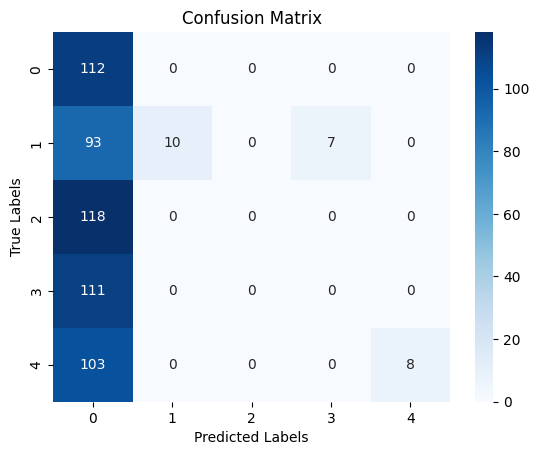

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_bool)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [80]:
import collections
print(collections.Counter(y_train))


Counter({4: 459, 1: 458, 0: 456, 2: 441, 3: 436})


In [82]:
feature_extractor_layer = hub.KerasLayer(
    url, input_shape=(224, 224, 3), trainable=True  # Change this to True
)


In [84]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), ...)  # Lower learning rate


SyntaxError: positional argument follows keyword argument (766867113.py, line 1)

In [87]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


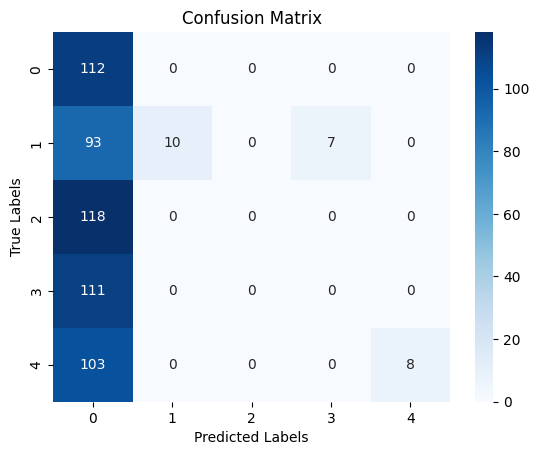

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_bool)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [92]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))


{0.0: 540000, 1.0: 60000}


In [94]:
from imblearn.over_sampling import RandomOverSampler
import numpy as np

# Flatten input if it's image data
x_train_flat = x_train.reshape(len(x_train), -1)

# Resample to balance
ros = RandomOverSampler()
x_resampled, y_resampled = ros.fit_resample(x_train_flat, y_train)

# Reshape back if image (e.g., 28x28x1)
x_resampled = x_resampled.reshape(-1, 28, 28, 1)

# Now use x_resampled and y_resampled to train your model


ModuleNotFoundError: No module named 'sklearn.utils._metadata_requests'

In [95]:
!pip install --upgrade scikit-learn imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 104.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


In [96]:
from imblearn.over_sampling import RandomOverSampler
import numpy as np

# Flatten input if it's image data
x_train_flat = x_train.reshape(len(x_train), -1)

# Resample to balance
ros = RandomOverSampler()
x_resampled, y_resampled = ros.fit_resample(x_train_flat, y_train)

# Reshape back if image (e.g., 28x28x1)
x_resampled = x_resampled.reshape(-1, 28, 28, 1)

# Now use x_resampled and y_resampled to train your model



ImportError: cannot import name 'UnsetMetadataPassedError' from 'sklearn.exceptions' (/usr/local/lib/python3.11/dist-packages/sklearn/exceptions.py)

In [97]:
!pip install -U scikit-learn==1.3.2 imbalanced-learn==0.11.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 90.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 16.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


In [98]:
!pip install --force-reinstall scikit-learn==1.3.2 imbalanced-learn==0.11.0



  Using cached scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl.metadata (8.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.4 MB/s eta 0:00:00
Using cached scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)
Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 88.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 53.4 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully uninstalled threadpoolctl-3.6.0
  Attempting uninstall: numpy
    Found existing in

In [101]:
import numpy as np

# Separate class 0 and class 1
x_0 = x_train[y_train == 0]
x_1 = x_train[y_train == 1]
y_0 = y_train[y_train == 0]
y_1 = y_train[y_train == 1]

# Oversample class 1 to match class 0
repeat_factor = len(y_0) // len(y_1)
x_1_oversampled = np.tile(x_1, (repeat_factor, 1, 1, 1))[:len(y_0)]
y_1_oversampled = np.tile(y_1, repeat_factor)[:len(y_0)]

# Combine
x_balanced = np.concatenate([x_0, x_1_oversampled])
y_balanced = np.concatenate([y_0, y_1_oversampled])

# Shuffle
indices = np.random.permutation(len(y_balanced))
x_balanced = x_balanced[indices]
y_balanced = y_balanced[indices]


IndexError: boolean index did not match indexed array along dimension 1; dimension is 28 but corresponding boolean dimension is 10

In [102]:
import numpy as np

# Separate the classes
x0 = x_train[y_train == 0]
x1 = x_train[y_train == 1]
y0 = y_train[y_train == 0]
y1 = y_train[y_train == 1]

# Oversample class 1
repeat_times = len(y0) // len(y1)
x1_oversampled = np.tile(x1, (repeat_times, 1, 1, 1))[:len(y0)]
y1_oversampled = np.tile(y1, repeat_times)[:len(y0)]

# Combine
x_balanced = np.concatenate([x0, x1_oversampled])
y_balanced = np.concatenate([y0, y1_oversampled])


IndexError: boolean index did not match indexed array along dimension 1; dimension is 28 but corresponding boolean dimension is 10

In [103]:
y_train_labels = np.argmax(y_train, axis=1)


In [104]:
x0 = x_train[y_train_labels == 0]
x1 = x_train[y_train_labels == 1]
y0 = y_train[y_train_labels == 0]
y1 = y_train[y_train_labels == 1]


In [106]:
import numpy as np

# Oversample class 1
repeat_times = len(y0) // len(y1)
x1_oversampled = np.tile(x1, (repeat_times, 1, 1, 1))[:len(y0)]
y1_oversampled = np.tile(y1, (repeat_times, 1))[:len(y0)]  # if still one-hot

# Combine
x_balanced = np.concatenate([x0, x1_oversampled])
y_balanced = np.concatenate([y0, y1_oversampled])

# Shuffle
indices = np.random.permutation(len(x_balanced))
x_balanced = x_balanced[indices]
y_balanced = y_balanced[indices]


In [107]:
model.fit(x_balanced, y_balanced, epochs=20, validation_split=0.2)


Epoch 1/20


ValueError: Exception encountered when calling layer 'keras_layer_16' (type KerasLayer).

Could not find matching concrete function to call loaded from the SavedModel. Got:
  Positional arguments (4 total):
    * <tf.Tensor 'inputs:0' shape=(None, 28, 28, 1) dtype=float32>
    * False
    * False
    * 0.99
  Keyword arguments: {}

 Expected these arguments to match one of the following 4 option(s):

Option 1:
  Positional arguments (4 total):
    * TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='inputs')
    * False
    * False
    * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
  Keyword arguments: {}

Option 2:
  Positional arguments (4 total):
    * TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='inputs')
    * False
    * True
    * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
  Keyword arguments: {}

Option 3:
  Positional arguments (4 total):
    * TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='inputs')
    * True
    * True
    * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
  Keyword arguments: {}

Option 4:
  Positional arguments (4 total):
    * TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='inputs')
    * True
    * False
    * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
  Keyword arguments: {}

Call arguments received by layer 'keras_layer_16' (type KerasLayer):
  • inputs=tf.Tensor(shape=(None, 28, 28, 1), dtype=float32)
  • training=None

In [108]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 2250
'y' sizes: 60000


In [109]:
model.fit(x_balanced, y_balanced, epochs=20, validation_split=0.2)

Epoch 1/20


ValueError: Exception encountered when calling layer 'keras_layer_16' (type KerasLayer).

Could not find matching concrete function to call loaded from the SavedModel. Got:
  Positional arguments (4 total):
    * <tf.Tensor 'inputs:0' shape=(None, 28, 28, 1) dtype=float32>
    * False
    * False
    * 0.99
  Keyword arguments: {}

 Expected these arguments to match one of the following 4 option(s):

Option 1:
  Positional arguments (4 total):
    * TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='inputs')
    * False
    * False
    * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
  Keyword arguments: {}

Option 2:
  Positional arguments (4 total):
    * TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='inputs')
    * False
    * True
    * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
  Keyword arguments: {}

Option 3:
  Positional arguments (4 total):
    * TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='inputs')
    * True
    * True
    * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
  Keyword arguments: {}

Option 4:
  Positional arguments (4 total):
    * TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='inputs')
    * True
    * False
    * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
  Keyword arguments: {}

Call arguments received by layer 'keras_layer_16' (type KerasLayer):
  • inputs=tf.Tensor(shape=(None, 28, 28, 1), dtype=float32)
  • training=None

In [110]:
import tensorflow as tf

x_balanced_resized = tf.image.resize(x_balanced, [224, 224])  # Resize
x_balanced_resized = tf.image.grayscale_to_rgb(x_balanced_resized)  # Convert 1 channel → 3


In [111]:
model.fit(x_balanced_resized, y_balanced, epochs=20, validation_split=0.2)


Epoch 1/20


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(None, 10), output.shape=(None, 5)

In [113]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)  # Enables clearer traceback


In [114]:
model.fit(x_balanced_resized, y_balanced, epochs=20, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(32, 10), output.shape=(32, 5)

In [115]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [116]:
y_balanced_labels = np.argmax(y_balanced, axis=1)
model.fit(x_balanced_resized, y_balanced_labels, epochs=20, validation_split=0.2)


Epoch 1/20


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(32,), output.shape=(32, 5)

In [117]:
y_balanced_labels = np.argmax(y_balanced, axis=1)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_balanced_resized, y_balanced_labels, epochs=20, validation_split=0.2)


Epoch 1/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 48s 280ms/step - accuracy: 0.9979 - loss: 0.0411 - val_accuracy: 1.0000 - val_loss: 4.7684e-07
Epoch 2/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 40s 269ms/step - accuracy: 1.0000 - loss: 4.7684e-07 - val_accuracy: 1.0000 - val_loss: 4.7684e-07
Epoch 3/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 40s 268ms/step - accuracy: 1.0000 - loss: 4.7684e-07 - val_accuracy: 1.0000 - val_loss: 4.7684e-07
Epoch 4/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 40s 268ms/step - accuracy: 1.0000 - loss: 4.7684e-07 - val_accuracy: 1.0000 - val_loss: 4.7684e-07
Epoch 5/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 40s 268ms/step - accuracy: 1.0000 - loss: 4.7684e-07 - val_accuracy: 1.0000 - val_loss: 4.7684e-07
Epoch 6/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 40s 269ms/step - accuracy: 1.0000 - loss: 4.7684e-07 - val_accuracy: 1.0000 - val_loss: 4.7684e-07
Epoch 7/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 40s 268ms/step - accuracy: 1.0000 - loss: 4.7684e-07 - val_accuracy: 1.0000 - val_loss: 4.7684e-07
Epoch 8/20
149/149 ━━━━━━━━━━━━

In [123]:
import pandas as pd
import plotly.graph_objects as go

# Check the keys in your history to confirm
print(history.history.keys())

# Create the figure
fig = go.Figure()

# Plot training accuracy
fig.add_trace(go.Scatter(
    y=history.history['accuracy'],
    mode='lines+markers',
    name='Train Accuracy'
))

# Plot validation accuracy
fig.add_trace(go.Scatter(
    y=history.history['val_accuracy'],
    mode='lines+markers',
    name='Validation Accuracy'
))

fig.update_layout(
    title='Training and Validation Accuracy per Epoch',
    xaxis_title='Epoch',
    yaxis_title='Accuracy',
    template='plotly_white'
)

fig.show()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


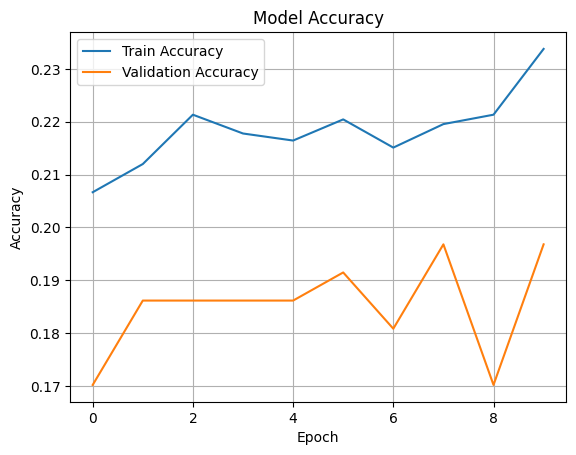

In [124]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


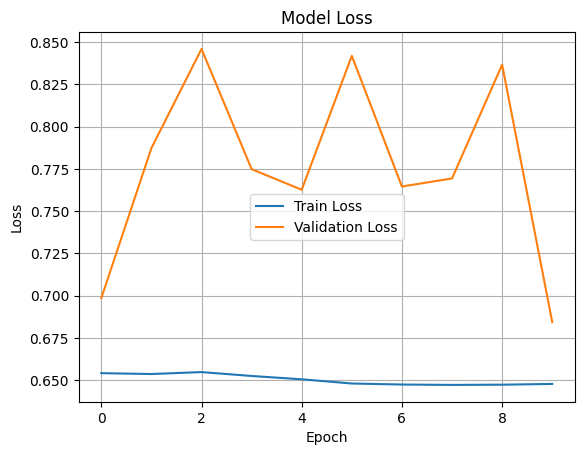

In [125]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [126]:
a1 = cv2.imread("/kaggle/input/rice-image-dataset/Rice_Image_Dataset")
a1 = cv2.resize(a1, (224, 224))      # Resize image to match model input
a1 = np.array(a1)
a1 = a1 / 255                        # Normalize pixel values (0–1)
a1 = np.expand_dims(a1, 0)          # Add batch dimension: (1, 224, 224, 3)

pred = model.predict(a1)            # Predict class probabilities
pred = pred.argmax()                # Get the predicted class index
pred


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [128]:
a1 = cv2.imread("/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Basmati/basmati (10).jpg")


In [129]:
a1 = cv2.imread("/kaggle/input/rice-image-dataset/Rice_Image_Dataset")
a1 = cv2.resize(a1, (224, 224))      # Resize image to match model input
a1 = np.array(a1)
a1 = a1 / 255                        # Normalize pixel values (0–1)
a1 = np.expand_dims(a1, 0)          # Add batch dimension: (1, 224, 224, 3)

pred = model.predict(a1)            # Predict class probabilities
pred = pred.argmax()                # Get the predicted class index
pred


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [130]:
a1 = cv2.imread("/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Basmati/basmati (10).jpg")


In [131]:
if a1 is None:
    print("Image not found or path is incorrect!")
else:
    print("Image loaded successfully:", a1.shape)


Image loaded successfully: (250, 250, 3)


In [132]:
import cv2
import numpy as np

# Make sure the path points to a valid image file
a1 = cv2.imread("/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Basmati/basmati (10).jpg")

if a1 is None:
    print("Image not found! Check the path.")
else:
    a1 = cv2.cvtColor(a1, cv2.COLOR_BGR2RGB)
    a1 = cv2.resize(a1, (224, 224))
    a1 = a1 / 255.0
    a1 = np.expand_dims(a1, axis=0)

    pred = model.predict(a1)
    pred_class = np.argmax(pred)

    print("Predicted class index:", pred_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted class index: 0


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning:

Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.



In [133]:
import cv2
import numpy as np

a1 = cv2.imread("/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Basmati/basmati (10).jpg")
a1 = cv2.cvtColor(a1, cv2.COLOR_BGR2RGB)
a1 = cv2.resize(a1, (224, 224))
a1 = a1 / 255.0
a1 = np.expand_dims(a1, axis=0)

pred = model.predict(a1)
pred_class = np.argmax(pred)

print("Predicted class index:", pred_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted class index: 0


In [146]:
import numpy as np

# Assuming pred is an array of probabilities for a single sample
# e.g., pred = np.array([0.1, 0.8, 0.05, 0.05])
predicted_class_index = np.argmax(pred)

for i, j in df_labels.items():
    if predicted_class_index == j:
        print(i)

arborio


In [148]:
model.save("rice.h5")